# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    <li> Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> First, try a bootstrap hypothesis test.
    <li> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both frequentist tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    <li> Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What testing approach did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [2]:
import pandas as pd

df = pd.read_csv('data/human_body_temperature.csv')

In [3]:
# Your work here.

In [4]:
# Import section
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
from statsmodels.stats import weightstats as stests

# The Data: human_body_temperature.csv

1) 3 columns: 
temperature    float64
gender          object
heart_rate     float64
2) Gender: values are F or M
3) Samples count: 130

# Question: Is the distribution of body temperatures normal?

## Observations:
1) Based on histogram of the temperatures, samples are mostly normal-distributed.
2) BUT sample size is 130, can it consider large enough to make normal-distribution?

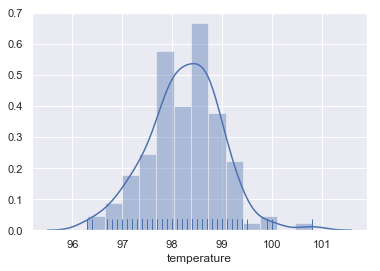

In [5]:
# PLAN:
# 1) compare a histogram of the sample data to a normal probability curve. 
# 2) Pearson's chi-squared test: not applicable as temp is NOT categorical data 

# Set default Seaborn style
sns.set()

# Plot histogram 
#_ = plt.hist(df['temperature'])
sns.distplot(df.temperature, rug = True) 
    
# Show histogram
plt.show()

# Question: Is the sample size large? Are the observations independent?

## Observations:
1) Sample size is 130 and should be large enough as the size is over 30 with fairly normal-distributed data set.
2) Observations should be independent as each data comes from a different person

In [6]:
print("Samples Count")
df.count()

Samples Count


temperature    130
gender         130
heart_rate     130
dtype: int64

# Question: Is the true population mean really 98.6 degrees F?
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> First, try a bootstrap hypothesis test.
    <li> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>

## Hypothesis:
1) H0: The true Mean is 98.6F<BR>
2) Ha: The true Mean is NOT 98.6F<BR>

## Process
1) We need to shift the sample data based on assumption that mean is 98.6F<BR>
2) Use Bootstrapping on stimulated data to stimulate data acquisition under H0<BR>

## Conclusion
1) We use one-sample test as we are not comparing 2 means from 2 different sets of data<BR>
2) We don't know the actual standard deviation so t statistic is the right one to use<BR>
3) With the low p-value (ie 0) for our H0 hypotheis, I conclude we reject the null hypothesis. Thus the true population mean is NOT 98.6F

In [7]:
# PLAN:
# 1) Try bootstrap hypothesis test.
# 2) frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
# 3) try using the other test. How is the result be different? Why?

def bootstrap_replicate_1d(data, func):
  return func(np.random.choice(data, size=len(data)))

def draw_bs_reps(data, func, size=1):
    return np.array([bootstrap_replicate_1d(data, func) for _ in range(size)])

def diff_from_mean(data, test_mean=98.6):
    return np.mean(data) - test_mean

temps = df["temperature"]
h0_mean = 98.6
sample_mean = np.mean(temps)

# Shift data
temp_shifted = temps - sample_mean + h0_mean

# Get P-value
bs_shifted = draw_bs_reps(temp_shifted, np.mean, 10000)
#confid_interval = np.percentile(bs_replicates, [1.25, 98.75])
p_value = np.sum(bs_shifted <= sample_mean) / len(bs_shifted)

#print("confid_interval:", confid_interval)
print("p_value:", p_value)

p_value: 0.0


In [8]:
# Z-statistics test
# 1) Use stats.norm.cdf or 
# 2) formula 
# a) p_error = std/n**0.5
# b) diff_obs = diff_from_mean(df['temparture'])
# c) z_val = diff_obs/ p_error

z_stat = (df.temperature.mean() - 98.6)/(df.temperature.std()/(np.sqrt(len(df.temperature))))
z_value = 2 * sp.stats.norm.cdf(z_stat)
print("z_value:", z_value)

z_value: 4.9021570141012155e-08


# Question: small sample of size 10 
<li>  Draw a small sample of size 10 from the data and repeat both frequentist tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>

## Conclusion
1) With small sample of 10, t statistic should be the right one to use<BR>
2) The t and z statistic values are very close to each other regardless of the pvalues. That indicates that both values can be used interchangeable in most cases.

In [9]:
# draw sample of size 10
small_sample = df.temperature.sample(10)

# t-statistic
# ref: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_1samp.html
t, p = sp.stats.ttest_1samp(small_sample,98.6)
print("t-statistic")
print('t =', t)
print("p =", p)

# z-statistic
# ref: https://gist.github.com/CnrLwlss/904a14ebed788073543d
z, p = stests.ztest(small_sample, value = 98.6)
print("z-statistic")
print('z =', z)
print("p1 =", p)

t-statistic
t = -1.1520910423016495
p = 0.27896695289333756
z-statistic
z = -1.1520910423016497
p1 = 0.24928366368740085


# Question: At what temperature should we consider someone's temperature to be "abnormal"?
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    <li> Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.
    </ul>

## Conclusion:
1) 95% confidence interval is between 98.125F to 98.375F
2) With significance level of 0.05, someone's temperature is considered to be "abnormal" if outside of above range.

In [12]:
# Assumption: significance level is 5% (0.05)
# 1) Get the confidence interval
# 2) Get final temp if abnormal

def draw_bs_reps(data, func, size=1):
    return np.array([bootstrap_replicate_1d(data, func) for _ in range(size)])

bs_replicates_temp = draw_bs_reps(df["temperature"], np.mean, 10000)
conf_int = np.percentile(bs_replicates_temp, [2.5,97.5])
print('95% confidence interval =', conf_int, 'degrees F')

95% confidence interval = [98.12538462 98.37538462] degrees F


# Question: Is there a significant difference between males and females in normal temperature?
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What testing approach did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>

## Conclusion:
1) I use Unpaired two-sample T-test as males and females populations are independent
   H0: no significant difference between males and females
   Ha: there is significant difference between males and females
   
2) Based on the p value of 0.024, we will reject the Null hypothesis and conclude that there is significant difference between temperatures of males and females  

In [26]:
# 2-sample test

m_temps = df[df['gender'] == 'M'].temperature
f_temps = df[df['gender'] == 'F'].temperature

std_error = np.sqrt(np.var(m_temps)/m_temps.size + np.var(f_temps)/f_temps.size )
t_val = (np.mean(m_temps) - np.mean(f_temps)) / std_error

print("mean temperature of male from samples:", np.mean(m_temps))
print("mean temperature of female from samples:", np.mean(f_temps))
print("t_val:", t_val)
print("p_val: ", sp.stats.ttest_ind(m_temps, f_temps) )

mean temperature of male from samples: 98.10461538461537
mean temperature of female from samples: 98.39384615384614
t_val: -2.3032202891943516
p_val:  Ttest_indResult(statistic=-2.2854345381656103, pvalue=0.02393188312239561)
